In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import copy

os.chdir("C:\\Users\\Hunsoo\\Desktop\\")

In [5]:
## 기상데이터 인덱스에 맞게 영상 불러오기 ## 여기로 부터 저장된거에  Multi temporal data로 만들어주고 이름 "raw_dataset_with_coms_pix_multitemporal"로 저장했음

##### Multitemporal로 저장해준거 불러오기 이름은 아래처럼 ##########
# coms_data_ir1 coms_data_ir2  coms_data_wv coms_data_swir coms_data_vis   (현시각, 기본)
# coms_data_ir1_1hr coms_data_ir2_1hr coms_data_wv_1hr coms_data_swir_1hr coms_data_vis_1hr  (1시간전)
# .....
# coms_data_ir1_4hr coms_data_ir2_4hr coms_data_wv_4hr coms_data_swir_4hr coms_data_vis_4hr  (4시간전)

raw_dataset_with_coms_pix_multitemporal=pd.read_excel('raw_dataset_with_coms_pix_multitemporal.xlsx')
raw_dataset_with_coms_pix_multitemporal.head(20)

,point,year,month,day,day365,clock,GMT,temp,windspeed,winddirection,...,coms_data_ir1_3hr,coms_data_ir2_3hr,coms_data_wv_3hr,coms_data_swir_3hr,coms_data_vis_3hr,coms_data_ir1_4hr,coms_data_ir2_4hr,coms_data_wv_4hr,coms_data_swir_4hr,coms_data_vis_4hr
0,165,2015,1,1,1,0,15,-1.2,7.6,NaN,...,skip,skip,skip,skip,skip,skip,skip,skip,skip,skip
1,165,2015,1,1,1,1,16,-1.8,10.4,NaN,...,skip,skip,skip,skip,skip,skip,skip,skip,skip,skip
2,165,2015,1,1,1,2,17,-1.7,10.9,NaN,...,skip,skip,skip,skip,skip,skip,skip,skip,skip,skip
3,165,2015,1,1,1,3,18,-1.6,11.6,NaN,...,706,674,878,936,50,skip,skip,skip,skip,skip
4,165,2015,1,1,1,4,19,-1.8,10.8,NaN,...,700,670,878,934,47,706,674,878,936,50
5,165,2015,1,1,1,5,20,-1.6,9.7,340.0,...,696,667,877,934,48,700,670,878,934,47
6,165,2015,1,1,1,6,21,-2.3,7.2,340.0,...,691,662,877,933,49,696,667,877,934,48
7,165,2015,1,1,1,7,22,-2.7,8.3,NaN,...,684,658,876,931,50,691,662,877,933,49
8,165,2015,1,1,1,8,23,-2.7,10.5,NaN,...,667,637,872,925,49,684,658,876,931,50
9,165,2015,1,1,1,9,0,-2.0,9.7,NaN,...,667,639,867,926,49,667,637,872,925,49


In [7]:
### 걍 raw_dataset으로 이름 다시 바꿔주기 ###
raw_dataset= copy.deepcopy(raw_dataset_with_coms_pix_multitemporal)

In [8]:
## clock 01, 02, 03 --> 1, 2, 3
raw_dataset.clock=pd.to_numeric(raw_dataset.clock)

In [9]:
## 시간 솎아주기

raw_dataset.drop(raw_dataset[raw_dataset.clock<9].index,inplace=True)
raw_dataset.drop(raw_dataset[raw_dataset.clock>19].index,inplace=True)

In [10]:
## 걍 이름 한번 바꿈 ;;;
dataset=raw_dataset

In [11]:
## 걍 이름 한번 바꿈 ;;;

dataset.drop(dataset[dataset.coms_data_ir1=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_ir2=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_wv=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_swir=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_vis=='skip'].index,inplace=True)

dataset.drop(dataset[dataset.coms_data_ir1_1hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_ir2_1hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_wv_1hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_swir_1hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_vis_1hr=='skip'].index,inplace=True)

dataset.drop(dataset[dataset.coms_data_ir1_2hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_ir2_2hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_wv_2hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_swir_2hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_vis_2hr=='skip'].index,inplace=True)

dataset.drop(dataset[dataset.coms_data_ir1_3hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_ir2_3hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_wv_3hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_swir_3hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_vis_3hr=='skip'].index,inplace=True)

dataset.drop(dataset[dataset.coms_data_ir1_4hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_ir2_4hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_wv_4hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_swir_4hr=='skip'].index,inplace=True)
dataset.drop(dataset[dataset.coms_data_vis_4hr=='skip'].index,inplace=True)

In [12]:
####################################################################################################################################

In [13]:
### feature 모음 (기록용) ###
"""fields_to_drop = ['point','year','month','day','day365','clock','GMT','temp','windspeed','winddirection','humidity',\
                  'vaporpressure','dewpointtemperature','locarpressure','seasurfacepressure','sunshine',\
                  'irradiation','snow','cloud','cloud2','lowcloud','sijung','lst','temp5cm','temp10cm',\
                  'temp20','temp30cm','pv_5h','pv_4h','pv_3h','pv_2h',pv_1h','pv0h','pv1h','pv2h','pv3h','pv4h','pv5h',\
                  'coms_data_ir1','coms_data_ir2','coms_data_wv','coms_data_swir','coms_data_vis',\
                  'coms_data_ir1_1hr','coms_data_ir2_1hr','coms_data_wv_1hr','coms_data_swir_1hr','coms_data_vis_1hr',\
                  'coms_data_ir1_2hr','coms_data_ir2_2hr','coms_data_wv_2hr','coms_data_swir_2hr','coms_data_vis_2hr',\
                  'coms_data_ir1_3hr','coms_data_ir2_3hr','coms_data_wv_3hr','coms_data_swir_3hr','coms_data_vis_3hr',\
                  'coms_data_ir1_4hr','coms_data_ir2_4hr','coms_data_wv_4hr','coms_data_swir_4hr','coms_data_vis_4hr']"""

"fields_to_drop = ['point','year','month','day','day365','clock','GMT','temp','windspeed','winddirection','humidity',                  'vaporpressure','dewpointtemperature','locarpressure','seasurfacepressure','sunshine',                  'irradiation','snow','cloud','cloud2','lowcloud','sijung','lst','temp5cm','temp10cm',                  'temp20','temp30cm','pv_5h','pv_4h','pv_3h','pv_2h',pv_1h','pv0h','pv1h','pv2h','pv3h','pv4h','pv5h',                  'coms_data_ir1','coms_data_ir2','coms_data_wv','coms_data_swir','coms_data_vis',                  'coms_data_ir1_1hr','coms_data_ir2_1hr','coms_data_wv_1hr','coms_data_swir_1hr','coms_data_vis_1hr',                  'coms_data_ir1_2hr','coms_data_ir2_2hr','coms_data_wv_2hr','coms_data_swir_2hr','coms_data_vis_2hr',                  'coms_data_ir1_3hr','coms_data_ir2_3hr','coms_data_wv_3hr','coms_data_swir_3hr','coms_data_vis_3hr',                  'coms_data_ir1_4hr','coms_data_ir2_4hr','coms_data_wv_4hr','coms_data_swir_4hr','coms_d

In [14]:
## 실험에 넣고픈거 ###

fields_to_drop = ['point','year','month','day','day365','clock','GMT','temp','windspeed','winddirection','humidity',\
                  'vaporpressure','dewpointtemperature','locarpressure','seasurfacepressure','sunshine',\
                  'irradiation','snow','cloud','cloud2','lowcloud','sijung','lst','temp5cm','temp10cm',\
                  'temp20','temp30cm','pv_5h','pv_4h','pv_3h','pv_2h','pv1h','pv3h','pv4h','pv5h',\
                  'coms_data_ir1_1hr','coms_data_ir2_1hr','coms_data_wv_1hr','coms_data_swir_1hr','coms_data_vis_1hr',\
                  'coms_data_ir1_3hr','coms_data_ir2_3hr','coms_data_wv_3hr','coms_data_swir_3hr','coms_data_vis_3hr']
                  
data = dataset.drop(fields_to_drop, axis=1)
data.head()

dataset = data.copy()
dataset.head()

,pv_1h,pv0h,pv2h,coms_data_ir1,coms_data_ir2,coms_data_wv,coms_data_swir,coms_data_vis,coms_data_ir1_2hr,coms_data_ir2_2hr,coms_data_wv_2hr,coms_data_swir_2hr,coms_data_vis_2hr,coms_data_ir1_4hr,coms_data_ir2_4hr,coms_data_wv_4hr,coms_data_swir_4hr,coms_data_vis_4hr
9,5,139,590,669,641,873,913,99,678,657,868,931,51,667,637,872,925,49
10,139,732,787,681,654,872,908,195,671,646,867,923,58,667,639,867,926,49
11,732,590,327,694,665,870,904,254,669,641,873,913,99,678,657,868,931,51
12,590,787,588,656,629,871,871,256,681,654,872,908,195,671,646,867,923,58
13,787,327,226,706,679,870,824,252,694,665,870,904,254,669,641,873,913,99


In [15]:
dataset.astype(float)
dataset=dataset.dropna()
dataset.head(20)

,pv_1h,pv0h,pv2h,coms_data_ir1,coms_data_ir2,coms_data_wv,coms_data_swir,coms_data_vis,coms_data_ir1_2hr,coms_data_ir2_2hr,coms_data_wv_2hr,coms_data_swir_2hr,coms_data_vis_2hr,coms_data_ir1_4hr,coms_data_ir2_4hr,coms_data_wv_4hr,coms_data_swir_4hr,coms_data_vis_4hr
9,5,139,590,669,641,873,913,99,678,657,868,931,51,667,637,872,925,49
10,139,732,787,681,654,872,908,195,671,646,867,923,58,667,639,867,926,49
11,732,590,327,694,665,870,904,254,669,641,873,913,99,678,657,868,931,51
12,590,787,588,656,629,871,871,256,681,654,872,908,195,671,646,867,923,58
13,787,327,226,706,679,870,824,252,694,665,870,904,254,669,641,873,913,99
14,327,588,69,665,639,869,843,220,656,629,871,871,256,681,654,872,908,195
15,588,226,3,682,655,868,872,221,706,679,870,824,252,694,665,870,904,254
33,57,225,759,670,644,867,907,128,731,705,898,933,47,671,642,886,925,50
34,225,413,1081,634,606,868,909,147,699,670,896,927,60,714,689,893,930,49
35,413,759,728,655,632,869,882,160,670,644,867,907,128,731,705,898,933,47


In [18]:
####### 밴드별 히스토그램 봐보기 ########

In [19]:
image_features = ['coms_data_ir1','coms_data_ir2','coms_data_wv','coms_data_swir','coms_data_vis']
dataset['coms_data_ir1']=dataset['coms_data_ir1'].astype(float)
dataset['coms_data_ir2']=dataset['coms_data_ir2'].astype(float)
dataset['coms_data_wv']=dataset['coms_data_wv'].astype(float)
dataset['coms_data_swir']=dataset['coms_data_swir'].astype(float)
dataset['coms_data_vis']=dataset['coms_data_vis'].astype(float)

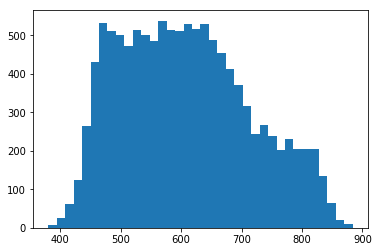

In [20]:
np_coms_data_ir1=np.array(dataset['coms_data_ir1'])
plt.hist(np_coms_data_ir1, bins='auto')
plt.show()

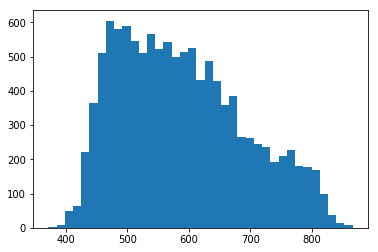

In [21]:
np_coms_data_ir2=np.array(dataset['coms_data_ir2'])
plt.hist(np_coms_data_ir2, bins='auto')
plt.show()

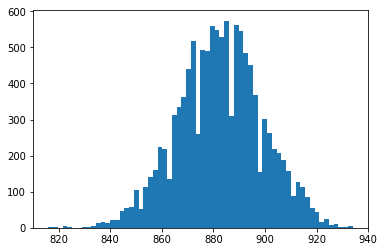

In [22]:
np_coms_data_wv=np.array(dataset['coms_data_wv'])
plt.hist(np_coms_data_wv, bins='auto')
#plt.hist(np_coms_data_wv, bins=500)
plt.show()

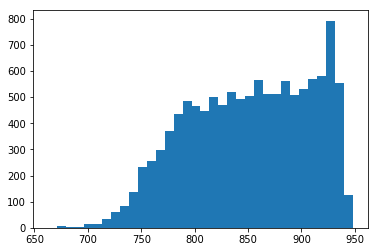

In [23]:
np_coms_data_swir=np.array(dataset['coms_data_swir'])
plt.hist(np_coms_data_swir, bins='auto')
#plt.hist(np_coms_data_swir, bins=500)
plt.show()

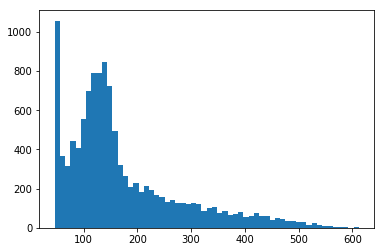

In [24]:
np_coms_data_vis=np.array(dataset['coms_data_vis'])
plt.hist(np_coms_data_vis, bins='auto')
#plt.hist(np_coms_data_vis, bins=500)
plt.show()

In [25]:
### 3sigma 이상 값 빼주는거 (안해도될듯?) ###

"""from scipy import stats
dataset_preprocessed=dataset[(np.abs(stats.zscore(dataset['coms_data_ir1'])) < 3)]

np.shape(dataset_preprocessed)

dataset_preprocessed=dataset_preprocessed[(np.abs(stats.zscore(dataset_preprocessed['coms_data_ir2'])) < 3)]

np.shape(dataset_preprocessed)

dataset_preprocessed=dataset_preprocessed[(np.abs(stats.zscore(dataset_preprocessed['coms_data_wv'])) < 3)]

np.shape(dataset_preprocessed)

dataset_preprocessed=dataset_preprocessed[(np.abs(stats.zscore(dataset_preprocessed['coms_data_swir'])) < 3)]

np.shape(dataset_preprocessed)

dataset_preprocessed=dataset_preprocessed[(np.abs(stats.zscore(dataset_preprocessed['coms_data_vis'])) < 3)]

np.shape(dataset_preprocessed)""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-25-628c54c9fc9d>, line 22)

In [26]:
## 그냥 이름 바꿈;;; 전처리했을수도잇으니깐
dataset_preprocessed=dataset

In [27]:
## MIN MAX Normalization 해주기


quant_features = ['pv_1h','pv0h','pv2h',\
                  'coms_data_ir1','coms_data_ir2','coms_data_wv','coms_data_swir','coms_data_vis',\
                  'coms_data_ir1_2hr','coms_data_ir2_2hr','coms_data_wv_2hr','coms_data_swir_2hr','coms_data_vis_2hr',\
                  'coms_data_ir1_4hr','coms_data_ir2_4hr','coms_data_wv_4hr','coms_data_swir_4hr','coms_data_vis_4hr']

scaled_features = {}

#for each in quant_features:
#    mean, std = data[each].mean(), data[each].std()
#    scaled_features[each] = [mean, std]
#    data.loc[:, each] = (data[each] - mean)/std

for each in quant_features:
    maxx, minn = dataset_preprocessed[each].max(), dataset_preprocessed[each].min()
    scaled_features[each] = [maxx, minn]
    dataset_preprocessed.loc[:, each] = (dataset_preprocessed[each] - minn)/(maxx-minn)
    
#for each in dataset_preprocessed:
#    maxx, minn = dataset_preprocessed[each].max(), dataset_preprocessed[each].min()
#    scaled_features[each] = [maxx, minn]
#    dataset_preprocessed.loc[:, each] = (dataset_preprocessed[each] - minn)/(maxx-minn)

In [28]:
## Min MAx값 보여주기
scaled_features

{'pv_1h': [1453, 0],
 'pv0h': [1453, 0],
 'pv2h': [1453, 0],
 'coms_data_ir1': [884.0, 380.0],
 'coms_data_ir2': [867.0, 371.0],
 'coms_data_wv': [934.0, 816.0],
 'coms_data_swir': [948.0, 663.0],
 'coms_data_vis': [612.0, 46.0],
 'coms_data_ir1_2hr': [885, 380],
 'coms_data_ir2_2hr': [869, 371],
 'coms_data_wv_2hr': [934, 816],
 'coms_data_swir_2hr': [948, 663],
 'coms_data_vis_2hr': [612, 46],
 'coms_data_ir1_4hr': [885, 380],
 'coms_data_ir2_4hr': [869, 371],
 'coms_data_wv_4hr': [935, 816],
 'coms_data_swir_4hr': [950, 663],
 'coms_data_vis_4hr': [612, 44]}

In [29]:
train_dataset = dataset_preprocessed.sample(frac=0.90,random_state=9)
test_dataset = dataset_preprocessed.drop(train_dataset.index)

In [30]:
## 뭘테스트? pv2h
train_labels = train_dataset.pop('pv2h')
test_labels = test_dataset.pop('pv2h')

In [31]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[dataset_preprocessed.shape[1]-1]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [32]:
## TEST ## 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 1 == 0: print('')
    print('.', end='')

EPOCHS = 100

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


Instructions for updating:
Use tf.cast instead.

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
51,0.011204,0.065885,0.011204,0.012701,0.071211,0.012701,51
52,0.011255,0.066001,0.011255,0.012815,0.070140,0.012815,52
53,0.011174,0.066000,0.011174,0.015235,0.077740,0.015235,53
54,0.011281,0.066480,0.011281,0.013188,0.074107,0.013188,54
55,0.011052,0.065641,0.011052,0.013111,0.071585,0.013111,55


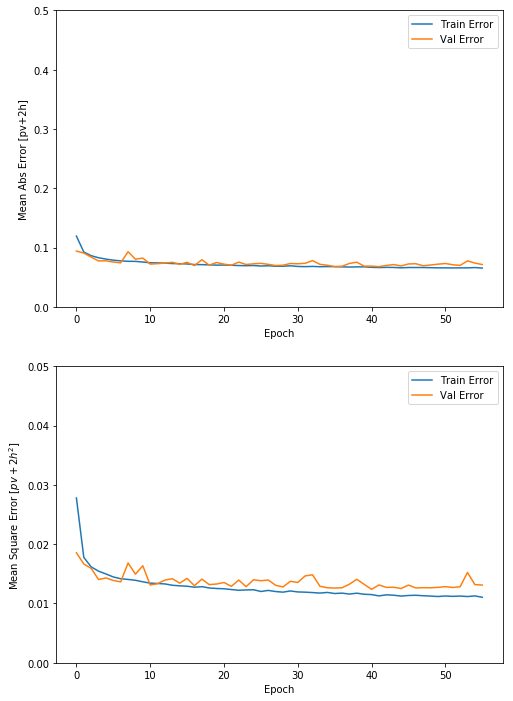

In [34]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure(figsize=(8,12))
  
  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pv+2h]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,0.5])
  plt.legend()
  
  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$pv+2h^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,0.05])
  plt.legend()
  plt.show()

plot_history(history)

In [35]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

print("테스트 세트의 평균 절대 오차: {:5.2f} pv+2h".format(mae))

테스트 세트의 평균 절대 오차:  0.07 pv+2h


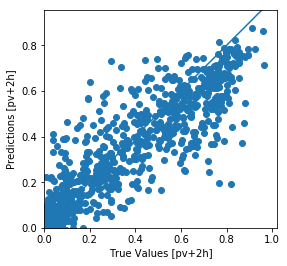

In [36]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [pv+2h]')
plt.ylabel('Predictions [pv+2h]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 5000], [-100, 5000])

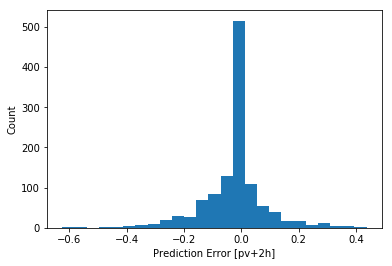

In [37]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [pv+2h]")
_ = plt.ylabel("Count")

In [38]:
array_test_labels=pd.Series(test_labels).values
array_test_predictions=pd.Series(test_predictions).values

In [39]:
## RMSE
rss=((array_test_labels-array_test_predictions)**2).sum()
mse=np.mean((array_test_labels-array_test_predictions)**2)
print("Final rmse value is =",np.sqrt(np.mean((array_test_labels-array_test_predictions)**2)))
rmse=np.sqrt(np.mean((array_test_labels-array_test_predictions)**2))

Final rmse value is = 0.11285230626575507


In [40]:
### CORR COEF
corr=np.corrcoef(array_test_labels,array_test_predictions)
corr[1,0]

0.9231200803987509

In [41]:
### MAPE

def mape_vectorized_v2(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

mape_vectorized_v2(array_test_labels,array_test_predictions)

C:\Users\Hunsoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


0.999802609380269

In [42]:
### nMAE

def nmae(a, b, c): 
    mask = a != 0
    return (np.fabs(a - b)/max(c))[mask].mean()

nmae(array_test_labels,array_test_predictions,test_labels)

0.0991791378479084

In [43]:
### nMAE

def nmae_wo_mask(a, b, c): 
    return (np.fabs(a - b)/max(c)).mean()

nmae_wo_mask(array_test_labels,array_test_predictions,test_labels)

0.07271572064104752

In [44]:
### Results 모음   ### RMSE CORRCOEF MAPE NMAE NMAE 순!!

results=[]
results.append(rmse)
results.append(corr[1,0])
results.append(mape_vectorized_v2(array_test_labels,array_test_predictions))
results.append(nmae(array_test_labels,array_test_predictions,test_labels))
results.append(nmae_wo_mask(array_test_labels,array_test_predictions,test_labels))
print(results)

[0.11285230626575507, 0.9231200803987509, 0.999802609380269, 0.0991791378479084, 0.07271572064104752]


C:\Users\Hunsoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
